# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from tqdm.notebook import tqdm, trange
import re
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from imblearn.over_sampling import SMOTE

# Read data into dataframe

In [2]:
df = pd.read_csv('clinical-observations.csv')
df.head()

,visit_occurrence_id,person_id,basis_inpatient_flg,basis_emergency_flg,patient_age_level_20,patient_age_level_30,patient_age_level_40,patient_age_level_50,patient_age_level_60,patient_age_level_70,...,tgt_acs_flg,tgt_ami_flg,tgt_pci_flg,tgt_cabg_flg,tgt_copd_flg,tgt_pressure_ulcer_flg,tgt_sepsis_flg,tgt_stroke_flg,tgt_vte_flg,tgt_readmission_30_flg
0,2db09df7cf4c3571649e1f8676bb0f03,f8e2dc640b2d410869e88a00fa17cc42,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6e49e2fbc80c06089a1761c386cba8e2,06a72512d6157297c2eebac6f07c2e2b,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,d35243a9d16f7f8e53d65877247ed019,e8771b5f1574e903922acabd715e3207,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,93c58b653359e63f4ca0d5ab4a337a66,6073bf2bf64dd77262f4718053c08172,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,345b18de427178abb9cb7ceadd807c0f,ece039e908406933cf56128bfd9c164d,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pd.set_option('Display.max_columns', 25)
df

,visit_occurrence_id,person_id,basis_inpatient_flg,basis_emergency_flg,patient_age_level_20,patient_age_level_30,patient_age_level_40,patient_age_level_50,patient_age_level_60,patient_age_level_70,patient_age_level_80,patient_age_level_90,...,icd_history_V87,icd_history_V88,tgt_acs_flg,tgt_ami_flg,tgt_pci_flg,tgt_cabg_flg,tgt_copd_flg,tgt_pressure_ulcer_flg,tgt_sepsis_flg,tgt_stroke_flg,tgt_vte_flg,tgt_readmission_30_flg
0,2db09df7cf4c3571649e1f8676bb0f03,f8e2dc640b2d410869e88a00fa17cc42,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,6e49e2fbc80c06089a1761c386cba8e2,06a72512d6157297c2eebac6f07c2e2b,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,d35243a9d16f7f8e53d65877247ed019,e8771b5f1574e903922acabd715e3207,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,93c58b653359e63f4ca0d5ab4a337a66,6073bf2bf64dd77262f4718053c08172,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,345b18de427178abb9cb7ceadd807c0f,ece039e908406933cf56128bfd9c164d,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50547,5826c0393a86247d818e841d867bb87e,5ab96b1c8e3f045ed0b25eff2a8930b2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
50548,68705d2f6df041064b352eaa183472ea,509707c782ae067234efeea8214a0884,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
50549,85155fcb5099d4628c6bd359c0f6d72c,886137d9cb16729900ab6192336265fa,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
50550,8a58b6b0b00cceb79c1dfa424f74fe61,20a0f0077b60f523d00db8875f35cf91,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isna().sum()

visit_occurrence_id       0
person_id                 0
basis_inpatient_flg       0
basis_emergency_flg       0
patient_age_level_20      0
                         ..
tgt_pressure_ulcer_flg    0
tgt_sepsis_flg            0
tgt_stroke_flg            0
tgt_vte_flg               0
tgt_readmission_30_flg    0
Length: 855, dtype: int64

In [5]:
max(df.isna().sum())

0

### Key columns are dropped because they are not numerical or categorical

In [6]:
df.drop(['visit_occurrence_id', 'person_id'], axis=1, inplace=True)

### Split independent and dependent variables

In [7]:
X = df.drop(['tgt_readmission_30_flg'],axis=1)
y = df['tgt_readmission_30_flg']

### In order to feature scale just the numerical features, they will be extracted, standardized and rejoined to the dataset.

In [8]:
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.scaler = StandardScaler()
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns], y)
        self.var_ = np.var(X[self.columns], y)
        return self
    
    def transform(self, X, y=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [9]:
columns_to_scale = []
for i in X.columns:
    if re.search('num', i):
        columns_to_scale.append(i)

columns_to_scale

['previous_stays_visit_last_days_num',
 'previous_stays_visit_first_days_num',
 'count_previous_stay_visit_num',
 'count_previous_emergency_visits_num',
 'count_previous_inpatient_visits_num',
 'count_readmit_003_num',
 'count_readmit_007_num',
 'count_readmit_014_num',
 'count_readmit_030_num',
 'count_readmit_060_num',
 'count_readmit_090_num',
 'count_readmit_180_num',
 'count_readmit_360_num']

In [10]:
columns_to_omit = [x for x in X.columns if x not in columns_to_scale]

In [11]:
absenteeism_scaler = CustomScaler(columns_to_scale)

In [12]:
absenteeism_scaler.fit(X)

CustomScaler(columns=['previous_stays_visit_last_days_num',
                      'previous_stays_visit_first_days_num',
                      'count_previous_stay_visit_num',
                      'count_previous_emergency_visits_num',
                      'count_previous_inpatient_visits_num',
                      'count_readmit_003_num', 'count_readmit_007_num',
                      'count_readmit_014_num', 'count_readmit_030_num',
                      'count_readmit_060_num', 'count_readmit_090_num',
                      'count_readmit_180_num', 'count_readmit_360_num'])

In [13]:
X_scaled = absenteeism_scaler.transform(X)
X_scaled

,basis_inpatient_flg,basis_emergency_flg,patient_age_level_20,patient_age_level_30,patient_age_level_40,patient_age_level_50,patient_age_level_60,patient_age_level_70,patient_age_level_80,patient_age_level_90,patient_gender_level_male,previous_stays_visit_last_days_num,...,icd_history_V85,icd_history_V87,icd_history_V88,tgt_acs_flg,tgt_ami_flg,tgt_pci_flg,tgt_cabg_flg,tgt_copd_flg,tgt_pressure_ulcer_flg,tgt_sepsis_flg,tgt_stroke_flg,tgt_vte_flg
0,1,0,0,0,0,0,0,1,0,0,0,-0.269910,...,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,1,-0.269910,...,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,-0.269910,...,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,-0.269910,...,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,-0.269910,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50547,1,1,0,0,0,0,1,0,0,0,0,-0.269910,...,0,0,0,0,0,0,0,0,0,0,0,0
50548,1,1,0,0,0,0,0,0,1,0,1,-0.269910,...,0,0,0,0,0,0,0,0,0,0,0,0
50549,1,0,0,0,0,0,0,0,1,0,1,1.156577,...,0,0,0,0,0,0,0,0,0,0,0,0
50550,1,1,0,0,0,0,0,1,0,0,0,-0.269910,...,0,0,0,0,0,0,0,0,0,0,0,0


# Statistical Modeling

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.18,
                                                    random_state=1)

In [15]:
clf1 = LogisticRegression(random_state=1)

In [16]:
clf1.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [17]:
y_pred1 = clf1.predict(X_test)
accuracy_score(y_pred1, y_test)

0.935054945054945

In [18]:
coef1 = clf1.coef_
coef1

array([[-1.37388445e+00,  1.17580967e-01,  4.89604173e-02,
        -1.66813465e-01, -1.67537741e-01, -2.80392529e-01,
        -2.43707655e-01, -2.99767932e-01, -1.39980433e-01,
         0.00000000e+00, -8.94932543e-02,  2.64398915e-02,
        -7.54986632e-02,  3.53037217e-01, -9.80519811e-03,
         2.38746086e-01, -2.23335507e-01, -4.65985635e-02,
         3.41778321e-01,  1.56577642e-01, -3.66801697e-02,
         1.97967550e-01,  3.26643212e-02,  1.16782962e-01,
        -1.97490464e-03, -1.52339637e-02, -4.82620702e-02,
        -6.09069698e-02,  1.41083029e-01,  7.13109628e-02,
        -1.76689259e-01, -3.75071901e-01, -4.74696140e-03,
         3.60484373e-01, -1.89473636e+00, -2.02886371e-02,
         4.81254548e-02,  1.24964653e-01, -3.02207836e-01,
         1.42843835e-01, -8.20041312e-02, -5.24258087e-01,
        -2.47325456e-01,  2.11742255e-01,  3.63322303e-01,
        -3.51345076e-01,  6.88812141e-01,  3.50501558e-01,
        -3.54172111e-01, -5.56000299e-02, -2.21567719e-0

In [19]:
feature_name1 = X_scaled.columns
summary_table1 = pd.DataFrame(columns=['Feature Name'], data=feature_name1)
summary_table1['Coefficient'] = coef1[0]
summary_table1.index += 1
summary_table1.loc[0] = ['Intercept', clf1.intercept_[0]]
summary_table1 = summary_table1.sort_index()
summary_table1

,Feature Name,Coefficient
0,Intercept,-1.872149
1,basis_inpatient_flg,-1.373884
2,basis_emergency_flg,0.117581
3,patient_age_level_20,0.048960
4,patient_age_level_30,-0.166813
...,...,...
848,tgt_copd_flg,2.707116
849,tgt_pressure_ulcer_flg,0.916579
850,tgt_sepsis_flg,3.228627
851,tgt_stroke_flg,2.905151


In [20]:
summary_table1['Odds_ratio'] = np.exp(summary_table1['Coefficient'])
summary_table1.sort_values('Odds_ratio', ascending=False, inplace=True)
summary_table1.reset_index(inplace=True, drop=True)
summary_table1

,Feature Name,Coefficient,Odds_ratio
0,tgt_sepsis_flg,3.228627,25.244979
1,tgt_stroke_flg,2.905151,18.267999
2,tgt_copd_flg,2.707116,14.985987
3,tgt_vte_flg,1.813608,6.132533
4,tgt_acs_flg,1.297884,3.661540
...,...,...,...
848,icd_present_493,-1.517602,0.219237
849,icd_present_V66,-1.528866,0.216781
850,icd_present_492,-1.550213,0.212203
851,Intercept,-1.872149,0.153793


## Model Selection
---
#### Find multiple models to compare in order to chose 2 final models to use for prediction
#### To compare models we will use multiple params and allow the grid search tool to optimize our comparable models
#### Model selection will be done by choosing the models by scoring (different problems require different scoring techniques)

### Support Vector Classifier and K-Nearest Neighbors take an unreasonably long amount of time to fit a large dataset

In [21]:
param_grid_nb = [{}]
param_grid_tree = [{'random_state':[1]},{'criterion':['gini', 'entropy'], 'max_depth':[2,3], 'min_samples_split':[3,5]}]
param_grid_rf = [{'random_state':[1]},{'n_estimators':[10, 30],'max_features':[0.2, 0.4], 'bootstrap':[True]}]
param_grid_boost = [{'random_state':[1]},{'n_estimators':[10,30,50],'learning_rate':[0.1,1]}]
param_grid_lr = [{'random_state':[1]},{'solver':['liblinear','sag','newton-cg']}]

model_names = ['NB','Tree','RF','Boosting','LR']

def init_classifiers():
    return([
            (GaussianNB(), model_names[0], param_grid_nb),
            (DecisionTreeClassifier(), model_names[1], param_grid_tree),
            (RandomForestClassifier(), model_names[2], param_grid_rf),
            (AdaBoostClassifier(), model_names[3], param_grid_boost),
            (LogisticRegression(), model_names[4], param_grid_lr)
           ])

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

  0%|          | 0/5 [00:00<?, ?it/s]

Precision: 12.66%
GaussianNB()


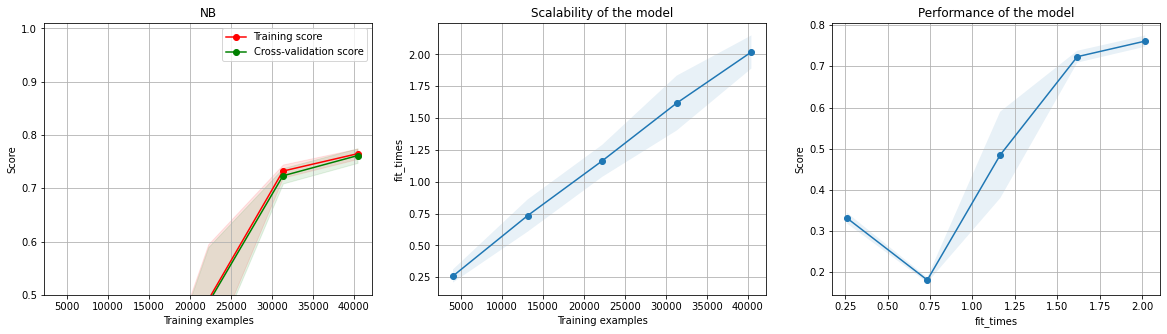

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

Precision: 47.77%
DecisionTreeClassifier(max_depth=3, min_samples_split=3)


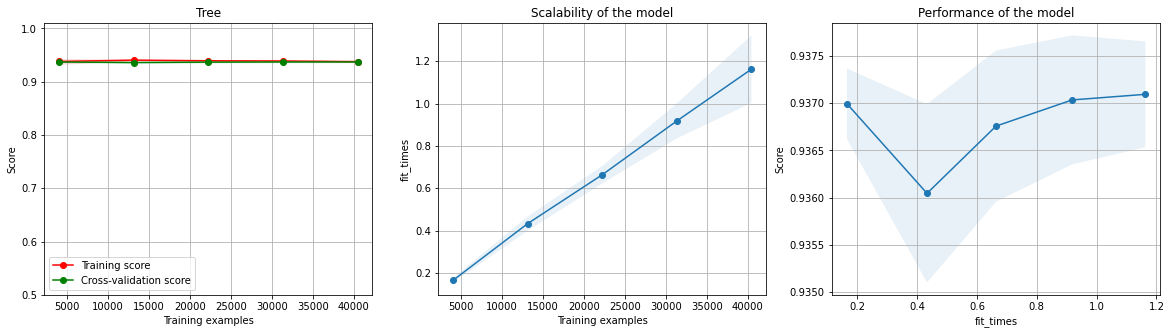

Precision: 50.30%
RandomForestClassifier(random_state=1)


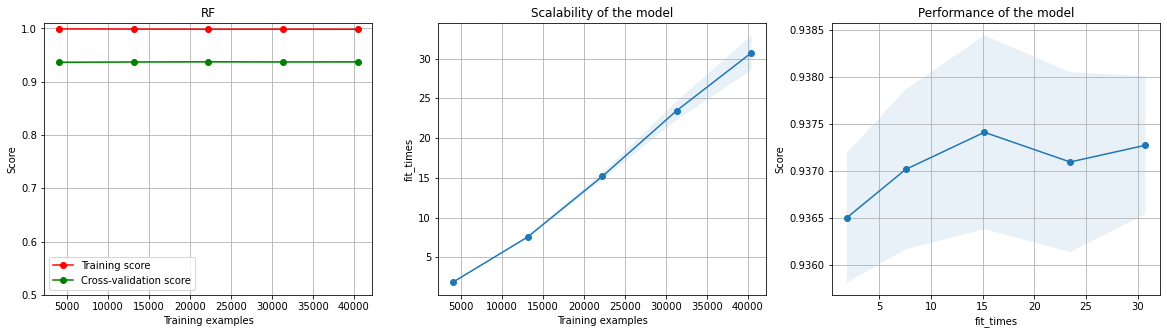

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

Precision: 45.00%
AdaBoostClassifier(learning_rate=0.1)


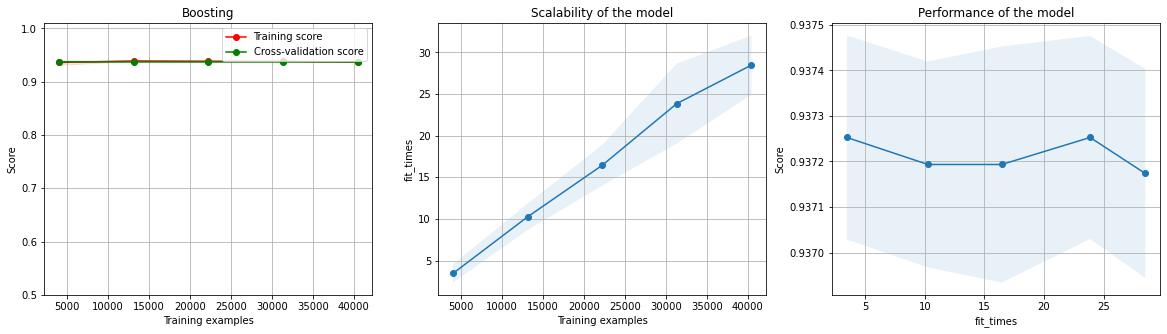

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Precision: 41.60%
LogisticRegression(solver='sag')


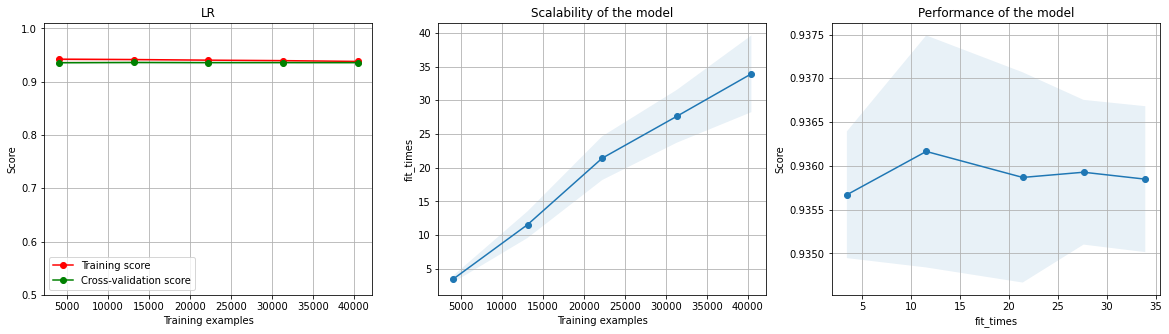

In [23]:
for i in trange(5):
    model = init_classifiers()[i][0]
    params = init_classifiers()[i][2]
    name = model_names[i]
    # will grid search through multiple params to fine tune our models to find a string version for each model to compare
    # setting the cross validation count to 10
    clf2 = GridSearchCV(model,params,cv=5,scoring='precision')
    results = clf2.fit(X_scaled, y)
    print(f'Precision: {results.best_score_*100:.2f}%')
    estimator = results.best_estimator_
    print(estimator)
    plot_learning_curve(estimator, name, X_scaled, y, (0.5, 1.01), cv=None, n_jobs=-1)
    plt.show()

# Models selected - Models with best performance
##### It is imperative to not misclassify patients as expected to return within 30 days because that would waste the patient navigators' time, which means that we need to avoid false positives at all costs. Hence, precision is the most important score to evaluate in this business case. 
---
### RandomForestClassifier has a precision of 50.30%
### DecisionTreeClassifier has a precision of 47.77%

### RandomForestClassifier(random_state=1)

In [24]:
clf3 = RandomForestClassifier(random_state=1)

In [25]:
clf3.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [26]:
y_pred3 = clf3.predict(X_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
np.array(y_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
clf3.predict_proba(X_test)[:10]

array([[0.81      , 0.19      ],
       [0.98      , 0.02      ],
       [0.68      , 0.32      ],
       [0.96057135, 0.03942865],
       [0.83      , 0.17      ],
       [0.96666667, 0.03333333],
       [0.9       , 0.1       ],
       [0.93      , 0.07      ],
       [0.99      , 0.01      ],
       [0.99      , 0.01      ]])

In [29]:
clf3.score(X_test,y_test)

0.936923076923077

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred3)

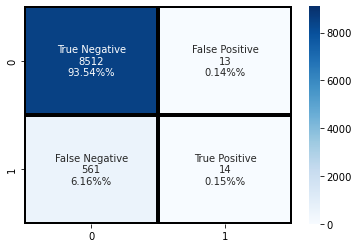

In [31]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=len(y_test));

In [32]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8525
           1       0.52      0.02      0.05       575

    accuracy                           0.94      9100
   macro avg       0.73      0.51      0.51      9100
weighted avg       0.91      0.94      0.91      9100



In [33]:
precision_recall_fscore_support(y_test, y_pred3, average='macro')

(0.7283433549277261, 0.5114114497003698, 0.506947142513552, None)

In [34]:
accuracy_score(y_test, y_pred3)

0.936923076923077

In [35]:
pickle.dump(clf3, open('RF.pkl', 'wb'))

In [36]:
RF = pickle.load(open('RF.pkl', 'rb'))
RF.score(X_test, y_test)

0.936923076923077

### DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [37]:
clf4 = DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [38]:
clf4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [39]:
y_pred4 = clf4.predict(X_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
np.array(y_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
clf4.predict_proba(X_test)[:10]

array([[0.54666667, 0.45333333],
       [0.95280213, 0.04719787],
       [0.95280213, 0.04719787],
       [0.95280213, 0.04719787],
       [0.7609375 , 0.2390625 ],
       [0.95280213, 0.04719787],
       [0.95280213, 0.04719787],
       [0.95280213, 0.04719787],
       [0.95280213, 0.04719787],
       [0.95280213, 0.04719787]])

In [42]:
clf4.score(X_test,y_test)

0.9364835164835165

In [43]:
cf_matrix = confusion_matrix(y_test, y_pred4)

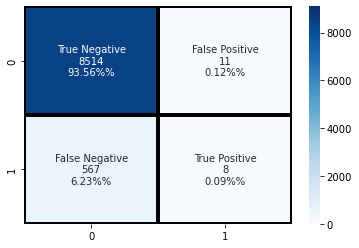

In [44]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=len(y_test));

In [45]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8525
           1       0.42      0.01      0.03       575

    accuracy                           0.94      9100
   macro avg       0.68      0.51      0.50      9100
weighted avg       0.90      0.94      0.91      9100



In [46]:
precision_recall_fscore_support(y_test, y_pred4, average='macro')

(0.6793072870481456, 0.5063113604488079, 0.49705315489707175, None)

In [47]:
accuracy_score(y_test, y_pred4)

0.9364835164835165

In [48]:
pickle.dump(clf4, open('Tree.pkl', 'wb'))

In [49]:
Tree = pickle.load(open('Tree.pkl', 'rb'))
Tree.score(X_test, y_test)

0.9364835164835165

### The RandomForestClassifier(random_state=1) seems to have the best precision and accuracy, but the model can be improved by balancing the target variable column.

In [50]:
print(f"{df['tgt_readmission_30_flg'].sum()}")

3169


In [51]:
print(f"Only {(df['tgt_readmission_30_flg'].sum())/len(df['tgt_readmission_30_flg'])*100:.2f}% of the target observations are 1s and the other {100-(df['tgt_readmission_30_flg'].sum())/len(df['tgt_readmission_30_flg'])*100:.2f}% are 0s")

Only 6.27% of the target observations are 1s and the other 93.73% are 0s


### Shuffling and Undersampling as a method to avoid the imbalance in the target variable

In [52]:
y_shuffled = y.sample(frac=1, random_state=1)

In [53]:
ones = int(np.sum(y_shuffled))
zeros = 0
indices_to_remove = []

In [54]:
for i in y_shuffled.index:
    if y_shuffled.loc[i] == 0:
        zeros += 1
        if zeros > ones:
            indices_to_remove.append(i)

X_balanced = X_scaled.drop(labels=indices_to_remove, axis=0)
y_balanced = y_shuffled.drop(labels=indices_to_remove, axis=0)

In [55]:
print(f"After shuffling and balancing the dataset, {(y_balanced.sum())/len(y_balanced)*100:.2f}% of the target observations are 1s and {100-(y_balanced.sum())/len(y_balanced)*100:.2f}% are 0s")

After shuffling and balancing the dataset, 50.00% of the target observations are 1s and 50.00% are 0s


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,
                                                    y_balanced,
                                                    test_size=0.18,
                                                    random_state=1)

In [57]:
clf5 = LogisticRegression(random_state=1)

In [58]:
clf5.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [59]:
clf5.score(X_test, y_test)

0.4899211218229623

In [60]:
y_pred5 = clf5.predict(X_test)
accuracy_score(y_pred5, y_test)

0.4899211218229623

In [61]:
coef5 = clf5.coef_
coef5

array([[ 8.67369367e-03, -5.20918796e-02,  5.07579858e-01,
         2.40028692e-01,  2.32478293e-01,  1.39945676e-01,
         1.30342805e-01,  1.27364390e-01, -3.33603237e-02,
         0.00000000e+00, -7.77361428e-03,  5.78289521e-02,
        -2.63868256e-02,  1.07375156e-01,  2.15148916e-02,
        -2.48725325e-02, -1.83235281e-01,  8.02116147e-02,
         1.06996871e-01, -5.46279540e-01,  1.42475127e-02,
         6.48060830e-01, -3.82218437e-01, -1.44791723e-02,
        -9.36200906e-02,  1.84145332e-01, -8.59069348e-02,
         1.63402270e-01, -9.29364679e-02, -1.05614390e-01,
        -5.54912010e-02,  3.81495608e-02,  0.00000000e+00,
         3.83344485e-02,  2.78741398e-01, -2.19978316e-02,
         3.87962775e-01, -5.88184199e-01, -3.27848843e-01,
        -2.39236812e-01,  4.96841029e-02,  8.78788858e-02,
         3.63343012e-01,  3.29154967e-03, -2.15172605e-01,
        -1.84910300e-01,  3.26130161e-01, -1.47950465e-01,
         1.71700956e-01,  2.21981567e-01, -1.92963403e-0

In [62]:
feature_name5 = X_balanced.columns
summary_table5 = pd.DataFrame(columns=['Feature Name'], data=feature_name5)
summary_table5['Coefficient'] = coef5[0]
summary_table5.index += 1
summary_table5.loc[0] = ['Intercept', clf5.intercept_[0]]
summary_table5 = summary_table5.sort_index()
summary_table5

,Feature Name,Coefficient
0,Intercept,0.018118
1,basis_inpatient_flg,0.008674
2,basis_emergency_flg,-0.052092
3,patient_age_level_20,0.507580
4,patient_age_level_30,0.240029
...,...,...
848,tgt_copd_flg,0.184611
849,tgt_pressure_ulcer_flg,0.145753
850,tgt_sepsis_flg,-0.324599
851,tgt_stroke_flg,0.315930


In [63]:
summary_table5['Odds_ratio'] = np.exp(summary_table5['Coefficient'])
summary_table5.sort_values('Odds_ratio', ascending=False, inplace=True)
summary_table5.reset_index(inplace=True, drop=True)
summary_table5

,Feature Name,Coefficient,Odds_ratio
0,icd_history_478,1.081031,2.947718
1,icd_history_731,0.998234,2.713486
2,icd_present_590,0.966094,2.627662
3,icd_history_431,0.962664,2.618664
4,icd_history_281,0.906709,2.476160
...,...,...,...
848,icd_present_E95,-1.100606,0.332669
849,icd_present_850,-1.102891,0.331910
850,icd_present_301,-1.118018,0.326927
851,icd_history_867,-1.178243,0.307819


### As shown above, the most strongly correlated features for this undersampled dataset are icd_history_478 (Upper Disease of Respiratory Tract), icd_history_731 (Osteitis deformans and osteopathies), icd_present_590 (Kidney Infection), icd_history_431 (Intracerebral hemorrhage), and icd_history_281 (Other deficiency anemias). Also, the least relevant feature is icd_history_429 (complications of heart disease). 

<AxesSubplot:xlabel='tgt_readmission_30_flg', ylabel='count'>

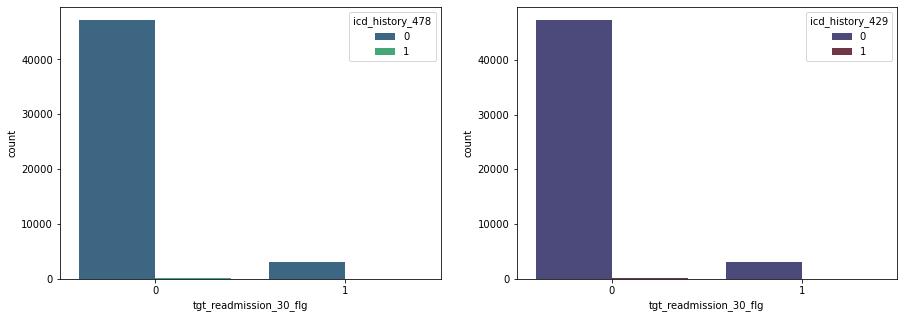

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x='tgt_readmission_30_flg',data=df,hue=summary_table5.loc[0, 'Feature Name'], palette='viridis', ax=ax[0])
sns.countplot(x='tgt_readmission_30_flg',data=df,hue=summary_table5.loc[len(summary_table5)-1, 'Feature Name'], palette='icefire', ax=ax[1])

# Modeling the Undersampled Data

  0%|          | 0/5 [00:00<?, ?it/s]

Precision: 50.40%
GaussianNB()


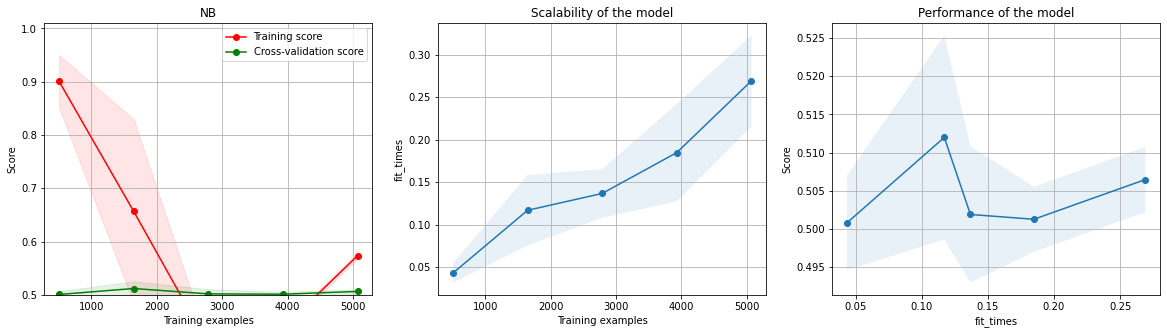

Precision: 49.84%
DecisionTreeClassifier(random_state=1)


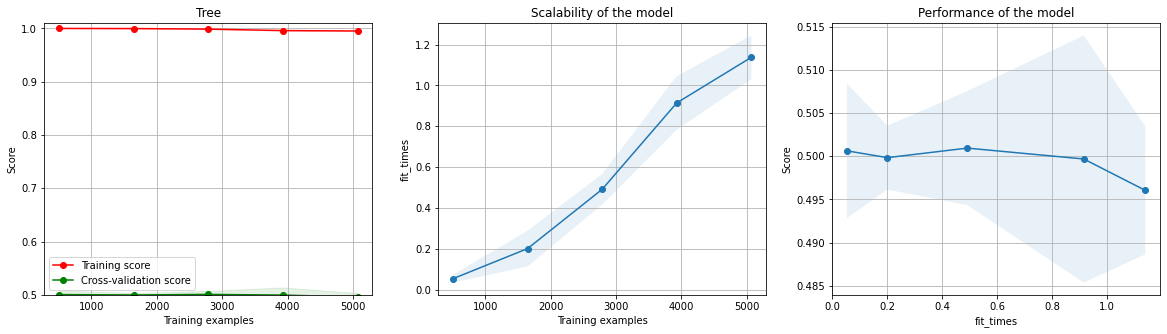

Precision: 49.88%
RandomForestClassifier(max_features=0.2, n_estimators=10)


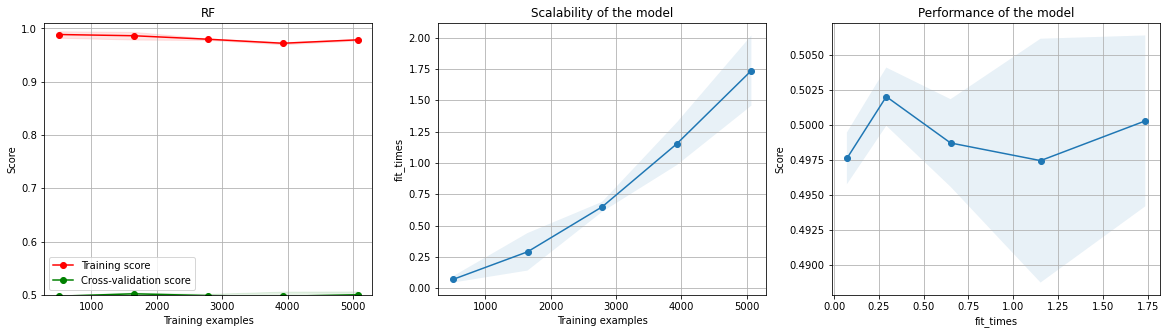

Precision: 49.86%
AdaBoostClassifier(learning_rate=0.1, n_estimators=30)


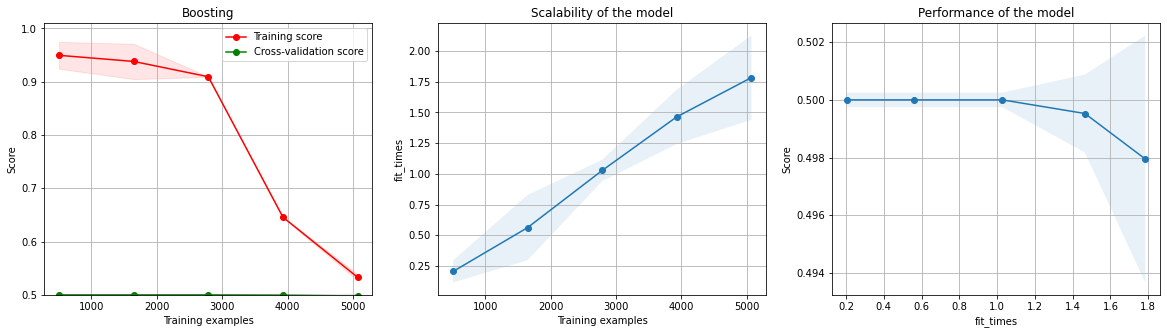

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Precision: 50.18%
LogisticRegression(solver='sag')


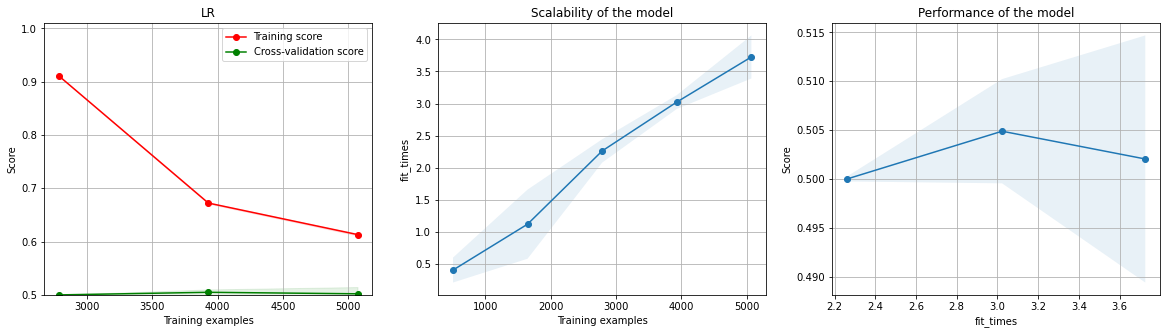

In [65]:
for i in trange(5):
    model = init_classifiers()[i][0]
    params = init_classifiers()[i][2]
    name = model_names[i]
    # will grid search through multiple params to fine tune our models to find a string version for each model to compare
    # setting the cross validation count to 10
    clf6 = GridSearchCV(model,params,cv=5,scoring='precision')
    results = clf6.fit(X_balanced, y_balanced)
    print(f'Precision: {results.best_score_*100:.2f}%')
    estimator = results.best_estimator_
    print(estimator)
    plot_learning_curve(estimator, name, X_balanced, y_balanced, (0.5, 1.01), cv=None, n_jobs=-1)
    plt.show()

# Models selected - Models with best performance
---
### GaussianNB has a precision of 50.40%
### LogisticRegression has a precision of 50.18%

### GaussianNB()

In [66]:
clf7 = GaussianNB()

In [67]:
clf7.fit(X_train,y_train)

GaussianNB()

In [68]:
y_pred7 = clf7.predict(X_test)
y_pred7

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [69]:
np.array(y_test)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [70]:
clf7.predict_proba(X_test)[:10]

array([[2.88989360e-52, 1.00000000e+00],
       [1.00000000e+00, 4.52547623e-19],
       [9.88970627e-01, 1.10293729e-02],
       [9.27135614e-07, 9.99999073e-01],
       [2.85587344e-20, 1.00000000e+00],
       [6.57843796e-09, 9.99999993e-01],
       [9.99604865e-01, 3.95135143e-04],
       [9.99729705e-01, 2.70295338e-04],
       [7.38528755e-14, 1.00000000e+00],
       [2.88201494e-19, 1.00000000e+00]])

In [71]:
clf7.score(X_test,y_test)

0.49605609114811566

In [72]:
cf_matrix = confusion_matrix(y_test, y_pred7)

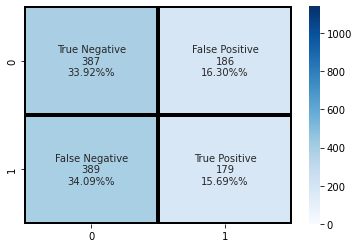

In [73]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=len(y_test));

In [74]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.50      0.68      0.57       573
           1       0.49      0.32      0.38       568

    accuracy                           0.50      1141
   macro avg       0.49      0.50      0.48      1141
weighted avg       0.49      0.50      0.48      1141



In [75]:
precision_recall_fscore_support(y_test, y_pred7, average='macro')

(0.4945611495551476, 0.4952667576137453, 0.47873340341025106, None)

In [76]:
accuracy_score(y_test, y_pred7)

0.49605609114811566

In [77]:
pickle.dump(clf7, open('NB.pkl', 'wb'))

In [78]:
NB = pickle.load(open('NB.pkl', 'rb'))
NB.score(X_test, y_test)

0.49605609114811566

### LogisticRegression(solver='sag')

In [79]:
clf8 = LogisticRegression(solver='sag')

In [80]:
clf8.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

In [81]:
y_pred8 = clf8.predict(X_test)
y_pred8

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [82]:
np.array(y_test)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [83]:
clf8.predict_proba(X_test)[:10]

array([[0.40821372, 0.59178628],
       [0.24415272, 0.75584728],
       [0.48810567, 0.51189433],
       [0.41740704, 0.58259296],
       [0.3179718 , 0.6820282 ],
       [0.53426356, 0.46573644],
       [0.43389979, 0.56610021],
       [0.44210128, 0.55789872],
       [0.31690984, 0.68309016],
       [0.15169188, 0.84830812]])

In [84]:
clf8.score(X_test,y_test)

0.48466257668711654

In [85]:
cf_matrix = confusion_matrix(y_test, y_pred8)

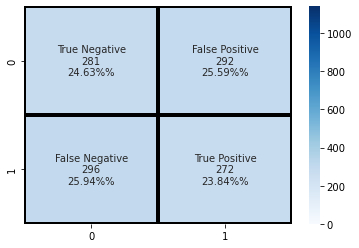

In [86]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=len(y_test));

In [87]:
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       573
           1       0.48      0.48      0.48       568

    accuracy                           0.48      1141
   macro avg       0.48      0.48      0.48      1141
weighted avg       0.48      0.48      0.48      1141



In [88]:
precision_recall_fscore_support(y_test, y_pred8, average='macro')

(0.4846356183241761, 0.4846373177985891, 0.484630511599324, None)

In [89]:
accuracy_score(y_test, y_pred8)

0.48466257668711654

In [90]:
pickle.dump(clf8, open('LR.pkl', 'wb'))

In [91]:
LR = pickle.load(open('LR.pkl', 'rb'))
LR.score(X_test, y_test)

0.48466257668711654

### The GaussianNB() seems to have the highest precision score.

# Oversampling is another method to avoid imbalance in a dataset

In [92]:
smote = SMOTE()

X = df.drop(['tgt_readmission_30_flg'],axis=1)
y = df['tgt_readmission_30_flg']
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_smote.shape)

Original dataset shape (50552,)
Resample dataset shape (94766,)


In [93]:
smote_df = x_smote.copy()
smote_df['tgt_readmission_30_flg'] = y_smote
smote_df

,basis_inpatient_flg,basis_emergency_flg,patient_age_level_20,patient_age_level_30,patient_age_level_40,patient_age_level_50,patient_age_level_60,patient_age_level_70,patient_age_level_80,patient_age_level_90,patient_gender_level_male,previous_stays_visit_last_days_num,...,icd_history_V87,icd_history_V88,tgt_acs_flg,tgt_ami_flg,tgt_pci_flg,tgt_cabg_flg,tgt_copd_flg,tgt_pressure_ulcer_flg,tgt_sepsis_flg,tgt_stroke_flg,tgt_vte_flg,tgt_readmission_30_flg
0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94761,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1
94762,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1
94763,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1
94764,1,0,0,0,0,0,0,0,0,0,1,9,...,0,0,0,0,0,0,0,0,0,0,0,1


In [94]:
print(f"After oversampling the dataset, {(y_smote.sum())/len(y_smote)*100:.2f}% of the target observations are 1s and {100-(y_smote.sum())/len(y_smote)*100:.2f}% are 0s")

After oversampling the dataset, 50.00% of the target observations are 1s and 50.00% are 0s


In [95]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,
                                                    y_smote,
                                                    test_size=0.18)

In [96]:
clf9 = LogisticRegression(random_state=1)

In [97]:
clf9.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [98]:
clf9.score(X_test, y_test)

0.8683901981474967

In [99]:
y_pred9 = clf9.predict(X_test)
accuracy_score(y_pred9, y_test)

0.8683901981474967

In [100]:
coef9 = clf9.coef_
coef9

array([[ 1.71384329e+00, -7.28140711e-01, -8.91457618e-01,
        -1.43809003e+00, -1.75591981e+00, -1.89277582e+00,
        -1.09776965e+00, -6.89406073e-01, -1.96331386e-01,
         0.00000000e+00, -8.27087105e-01, -4.71584318e-04,
         1.98313240e-04,  6.73317776e-01, -2.07819699e-01,
         6.73438181e-01, -7.32587142e-02, -4.35732263e-02,
         1.51199397e-01,  2.62490376e-01,  2.41977934e-01,
         3.15872174e-01,  3.21005377e-01,  6.00537205e-01,
        -1.70011534e-01,  1.04601314e-02,  3.18633526e-02,
         4.59041982e-02, -1.86030730e-01, -9.38540893e-02,
        -4.08053111e-01,  1.96791597e-02, -2.50054278e-04,
        -2.44934176e-01, -2.86025575e-01, -4.24133008e-01,
        -2.56381876e-01, -2.70100224e-02, -9.80639069e-02,
        -6.64983474e-01, -3.77153271e-02, -4.93355925e-02,
        -2.11425532e-02, -2.58623305e-01, -4.24931005e-02,
        -8.75918352e-02, -8.54652304e-02, -6.14374666e-02,
        -1.04613133e-01, -1.79836346e-01, -4.78188522e-0

In [101]:
feature_name9 = X_balanced.columns
summary_table9 = pd.DataFrame(columns=['Feature Name'], data=feature_name9)
summary_table9['Coefficient'] = coef9[0]
summary_table9.index += 1
summary_table9.loc[0] = ['Intercept', clf9.intercept_[0]]
summary_table9 = summary_table9.sort_index()
summary_table9

,Feature Name,Coefficient
0,Intercept,1.715676
1,basis_inpatient_flg,1.713843
2,basis_emergency_flg,-0.728141
3,patient_age_level_20,-0.891458
4,patient_age_level_30,-1.438090
...,...,...
848,tgt_copd_flg,1.001990
849,tgt_pressure_ulcer_flg,0.112115
850,tgt_sepsis_flg,1.800326
851,tgt_stroke_flg,0.449461


In [102]:
summary_table9['Odds_ratio'] = np.exp(summary_table9['Coefficient'])
summary_table9.sort_values('Odds_ratio', ascending=False, inplace=True)
summary_table9.reset_index(inplace=True, drop=True)
summary_table9

,Feature Name,Coefficient,Odds_ratio
0,tgt_sepsis_flg,1.800326,6.051623
1,Intercept,1.715676,5.560433
2,basis_inpatient_flg,1.713843,5.550252
3,tgt_acs_flg,1.250409,3.491771
4,tgt_ami_flg,1.248667,3.485692
...,...,...,...
848,icd_present_780,-1.424643,0.240594
849,patient_age_level_30,-1.438090,0.237381
850,patient_age_level_40,-1.755920,0.172748
851,icd_present_305,-1.891573,0.150834


## As shown above, the most strongly correlated features are basis_inpatient_flg, tgt_sepsis_flg, tgt_acs_flg, and tgt_ami_flg. Also, the least relevant feature is icd_present_305 (Use of drugs). 

<AxesSubplot:xlabel='tgt_readmission_30_flg', ylabel='count'>

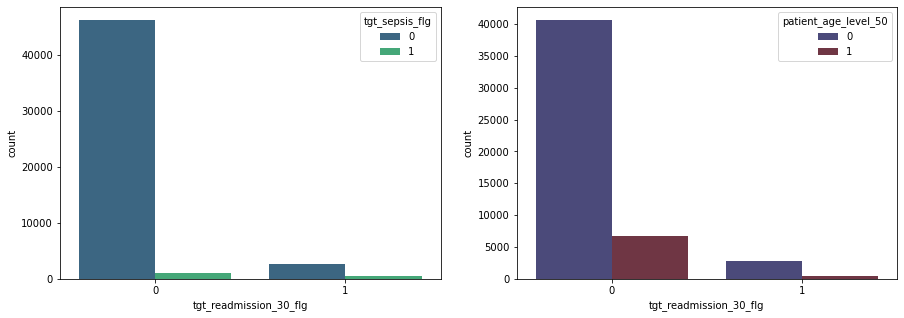

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x='tgt_readmission_30_flg',data=df,hue=summary_table9.loc[0, 'Feature Name'], palette='viridis', ax=ax[0])
sns.countplot(x='tgt_readmission_30_flg',data=df,hue=summary_table9.loc[len(summary_table9)-1, 'Feature Name'], palette='icefire', ax=ax[1])

# Model selection for the oversampled dataset

  0%|          | 0/5 [00:00<?, ?it/s]

Precision: 75.36%
GaussianNB()


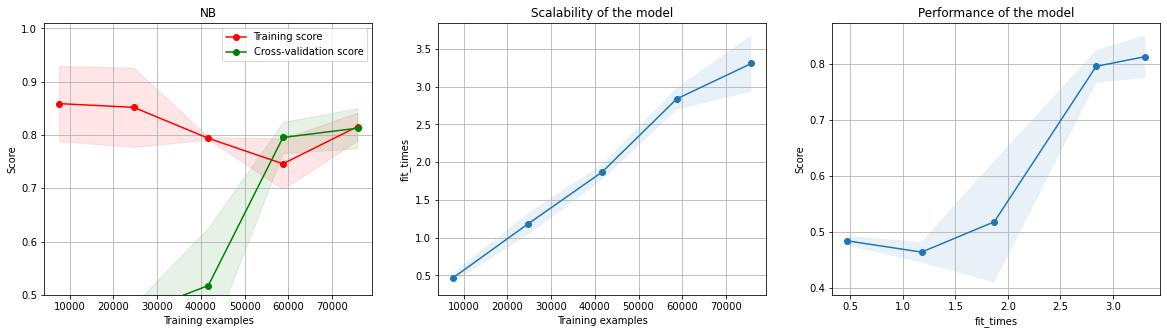

Precision: 86.98%
DecisionTreeClassifier(random_state=1)


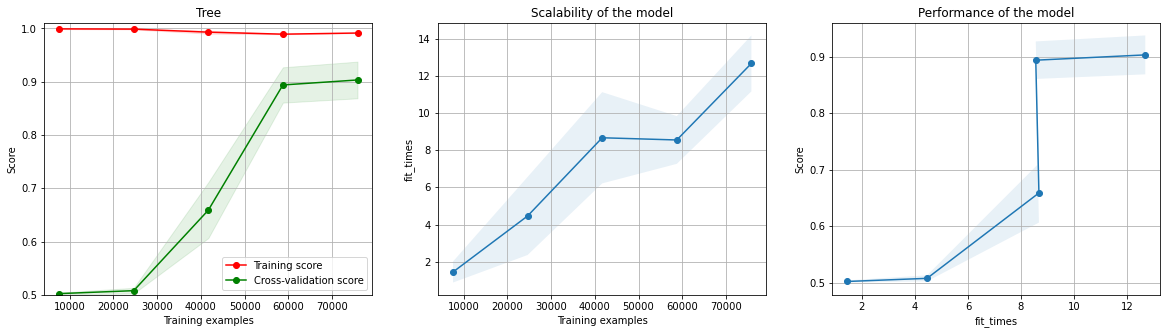

Precision: 95.70%
RandomForestClassifier(random_state=1)


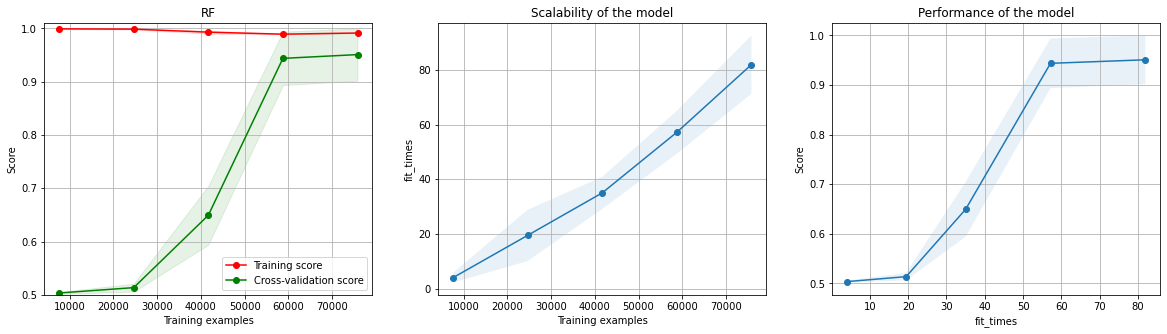

Precision: 81.83%
AdaBoostClassifier(random_state=1)


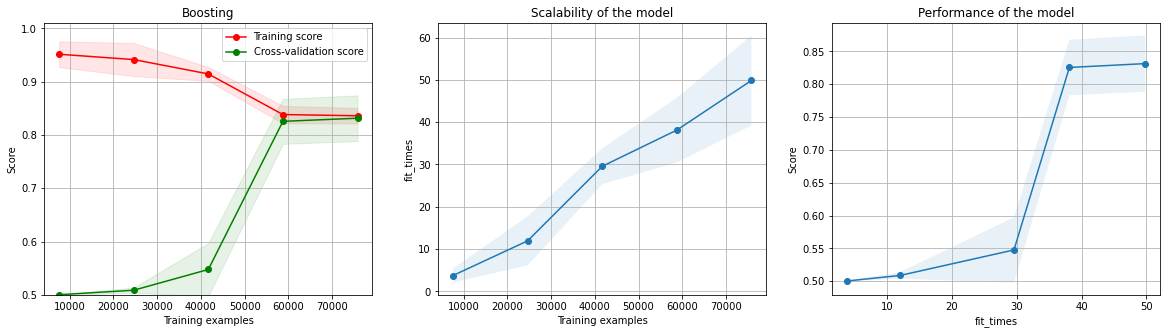

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Precision: 90.99%
LogisticRegression(solver='newton-cg')


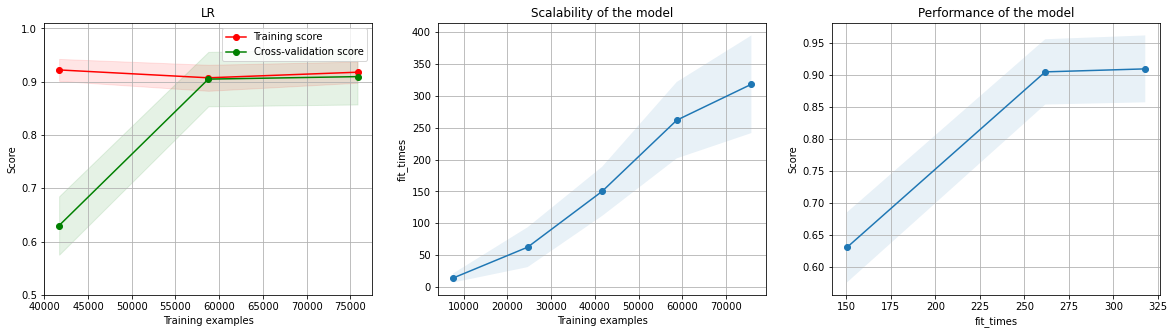

In [104]:
for i in trange(5):
    model = init_classifiers()[i][0]
    params = init_classifiers()[i][2]
    name = model_names[i]
    # will grid search through multiple params to fine tune our models to find a string version for each model to compare
    # setting the cross validation count to 10
    clf10 = GridSearchCV(model,params,cv=5,scoring='precision')
    results = clf10.fit(x_smote, y_smote)
    print(f'Precision: {results.best_score_*100:.2f}%')
    estimator = results.best_estimator_
    print(estimator)
    plot_learning_curve(estimator, name, x_smote, y_smote, (0.5, 1.01), cv=None, n_jobs=-1)
    plt.show()

# Models selected - Models with best performance
---
### RandomForestClassifier has a precision of 95.70%
### LogisticRegression has a precision 90.99%

### RandomForestClassifier(random_state=1)

In [105]:
clf11 = RandomForestClassifier(random_state=1)

In [106]:
clf11.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [107]:
y_pred11 = clf11.predict(X_test)
y_pred11

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [108]:
np.array(y_test)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [109]:
clf11.predict_proba(X_test)[:10]

array([[0.76      , 0.24      ],
       [0.92      , 0.08      ],
       [0.95027778, 0.04972222],
       [0.        , 1.        ],
       [0.76      , 0.24      ],
       [0.66      , 0.34      ],
       [0.        , 1.        ],
       [0.04123641, 0.95876359],
       [0.12      , 0.88      ],
       [0.        , 1.        ]])

In [110]:
clf11.score(X_test,y_test)

0.9536874193926603

In [111]:
cf_matrix = confusion_matrix(y_test, y_pred11)

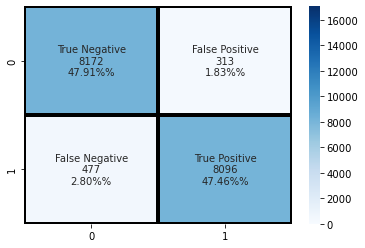

In [112]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=len(y_test));

In [113]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8485
           1       0.96      0.94      0.95      8573

    accuracy                           0.95     17058
   macro avg       0.95      0.95      0.95     17058
weighted avg       0.95      0.95      0.95     17058



In [114]:
precision_recall_fscore_support(y_test, y_pred11, average='macro')

(0.9538135457414006, 0.9537357868205404, 0.9536865000475583, None)

In [115]:
accuracy_score(y_test, y_pred11)

0.9536874193926603

In [116]:
pickle.dump(clf11, open('RFO.pkl', 'wb'))

In [117]:
RFO = pickle.load(open('RFO.pkl', 'rb'))
RFO.score(X_test, y_test)

0.9536874193926603

### LogisticRegression(solver='newton-cg')

In [118]:
clf12 = LogisticRegression(solver='newton-cg')

In [119]:
clf12.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [120]:
y_pred12 = clf11.predict(X_test)
y_pred12

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [121]:
np.array(y_test)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [122]:
clf12.predict_proba(X_test)[:10]

array([[9.99196575e-01, 8.03424894e-04],
       [9.58632859e-01, 4.13671409e-02],
       [6.47548593e-01, 3.52451407e-01],
       [1.27185043e-02, 9.87281496e-01],
       [9.94686160e-01, 5.31383995e-03],
       [4.36564929e-01, 5.63435071e-01],
       [3.75649543e-01, 6.24350457e-01],
       [2.34004904e-01, 7.65995096e-01],
       [1.16065736e-01, 8.83934264e-01],
       [1.04741519e-02, 9.89525848e-01]])

In [123]:
clf12.score(X_test,y_test)

0.9143510376362997

In [124]:
cf_matrix = confusion_matrix(y_test, y_pred12)

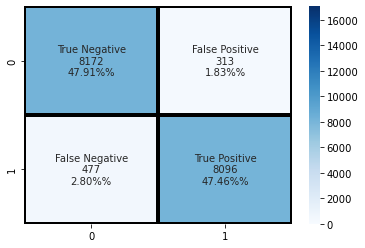

In [125]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=len(y_test));

In [126]:
print(classification_report(y_test, y_pred12))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8485
           1       0.96      0.94      0.95      8573

    accuracy                           0.95     17058
   macro avg       0.95      0.95      0.95     17058
weighted avg       0.95      0.95      0.95     17058



In [127]:
precision_recall_fscore_support(y_test, y_pred12, average='macro')

(0.9538135457414006, 0.9537357868205404, 0.9536865000475583, None)

In [128]:
accuracy_score(y_test, y_pred12)

0.9536874193926603

In [129]:
pickle.dump(clf12, open('LogregO.pkl', 'wb'))

In [130]:
LogregO = pickle.load(open('LogregO.pkl', 'rb'))
LogregO.score(X_test, y_test)

0.9143510376362997

### LR and RF both have a 95% precision, but the RandomForestRegressor(random_state=1) seems to have the highest accuracy.

# Final model selection
---
### I will once more train my data but on the entire dataset 

In [131]:
clf = RandomForestClassifier(random_state=1)

In [132]:
clf.fit(x_smote,y_smote)

RandomForestClassifier(random_state=1)

In [133]:
pickle.dump(clf, open('Final_Model.pkl', 'wb'))

In [134]:
Final_Model = pickle.load(open('Final_Model.pkl', 'rb'))

### Scoring the original dataset with the trained model

In [135]:
Final_Model.score(X_scaled, y)

0.9663514796645039

#### Now, to make predictions on future incoming data, use `Final_Model.predict()`